In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [6]:
data = {'value': np.random.normal(loc=0, scale=1, size=100)}
df = pd.DataFrame(data)

In [7]:
df['z_score'] = (df['value'] - df['value'].mean()) / df['value'].std()
outliers_zscore = df[np.abs(df['z_score']) > 3]
print("Outliers using Z-score method:")
print(outliers_zscore)

Outliers using Z-score method:
      value   z_score
7 -2.916581 -3.051024


In [11]:
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['value'] < (Q1 - 1.5 * IQR)) | (df['value'] > (Q3 + 1.5 * IQR))]
print("Outliers using IQR method:")
print(outliers_iqr)

Outliers using IQR method:
      value   z_score
7 -2.916581 -3.051024


In [12]:
def identify_outliers(df, column, method='z_score', threshold=3):
    if method == 'z_score':
        df['z_score'] = (df[column] - df[column].mean()) / df[column].std()
        outliers = df[np.abs(df['z_score']) > threshold]
    elif method == 'iqr':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    else:
        raise ValueError("Method should be 'z_score' or 'iqr'")
    return outliers

In [13]:
outliers = identify_outliers(df, 'value', method='iqr')
print("Generalized function outliers:")
print(outliers)

Generalized function outliers:
      value   z_score
7 -2.916581 -3.051024


In [14]:
df_no_outliers = df[(df['value'] >= (Q1 - 1.5 * IQR)) & (df['value'] <= (Q3 + 1.5 * IQR))]
print("Data without outliers:")
print(df_no_outliers)

Data without outliers:
       value   z_score
0  -0.393255 -0.499650
1  -0.613002 -0.721839
2   0.604501  0.509198
3  -0.732160 -0.842322
4  -1.976108 -2.100097
..       ...       ...
95 -0.110371 -0.213621
96  0.984600  0.893521
97 -1.130617 -1.245208
98 -0.949604 -1.062182
99 -0.259323 -0.364229

[99 rows x 2 columns]


In [15]:
df['value_log'] = np.log(df['value'].replace(0, np.nan).dropna())
print("Data with log transformation:")
print(df[['value', 'value_log']])

Data with log transformation:
       value  value_log
0  -0.393255        NaN
1  -0.613002        NaN
2   0.604501  -0.503351
3  -0.732160        NaN
4  -1.976108        NaN
..       ...        ...
95 -0.110371        NaN
96  0.984600  -0.015520
97 -1.130617        NaN
98 -0.949604        NaN
99 -0.259323        NaN

[100 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
median_value = df['value'].median()
df.loc[(df['value'] < (Q1 - 1.5 * IQR)) | (df['value'] > (Q3 + 1.5 * IQR)), 'value'] = median_value
print("Data with imputed outliers:")
print(df)

Data with imputed outliers:
       value   z_score  value_log
0  -0.393255 -0.499650        NaN
1  -0.613002 -0.721839        NaN
2   0.604501  0.509198  -0.503351
3  -0.732160 -0.842322        NaN
4  -1.976108 -2.100097        NaN
..       ...       ...        ...
95 -0.110371 -0.213621        NaN
96  0.984600  0.893521  -0.015520
97 -1.130617 -1.245208        NaN
98 -0.949604 -1.062182        NaN
99 -0.259323 -0.364229        NaN

[100 rows x 3 columns]


In [17]:
data = np.random.normal(loc=0, scale=1, size=(100, 2))
data = np.append(data, [[10, 10], [12, 12]], axis=0)  # Adding outliers
df_lof = pd.DataFrame(data, columns=['feature1', 'feature2'])

In [18]:
lof = LocalOutlierFactor(n_neighbors=20)
df_lof['lof_score'] = lof.fit_predict(data)
df_lof['lof_factor'] = lof.negative_outlier_factor_

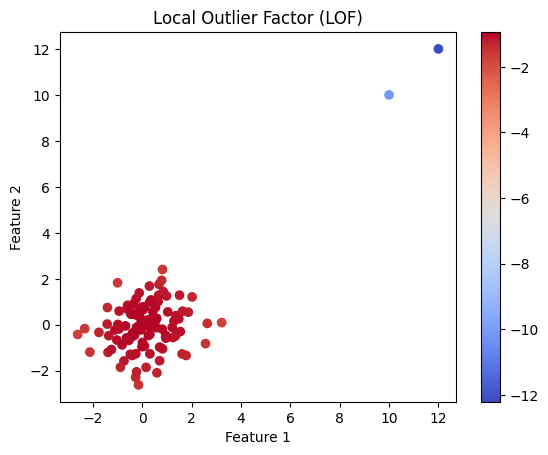

In [22]:
scatter = plt.scatter(df_lof['feature1'], df_lof['feature2'], c=df_lof['lof_factor'], cmap='coolwarm')
plt.title('Local Outlier Factor (LOF)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

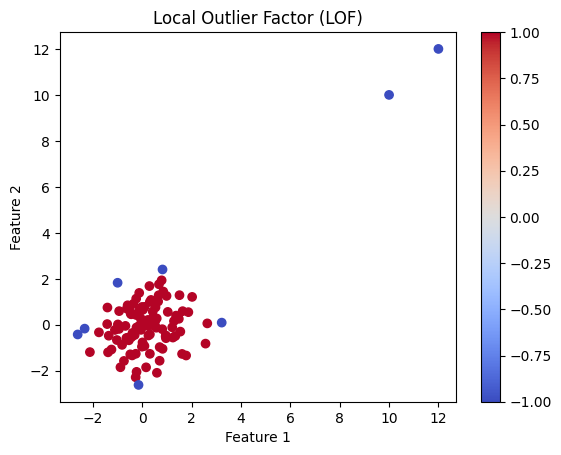

In [23]:
plt.scatter(df_lof['feature1'], df_lof['feature2'], c=df_lof['lof_score'], cmap='coolwarm')
plt.title('Local Outlier Factor (LOF)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()
